# Imports

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

import numpy as np
import PIL
import PIL.Image

# Data Loading

In [44]:
#https://keras.io/api/data_loading/

BATCH_SIZE = 32
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
IMAGE_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)

train_ds = keras.utils.image_dataset_from_directory(
    directory='coin_dataset/coins_images/currency_recognition',
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="training",
    seed=212,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    crop_to_aspect_ratio=True)

val_ds = keras.utils.image_dataset_from_directory(
    directory='coin_dataset/coins_images/currency_recognition',
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="validation",
    seed=212,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    crop_to_aspect_ratio=True)

class_names = train_ds.class_names
print(class_names)


Found 1229 files belonging to 6 classes.
Using 984 files for training.
Found 1229 files belonging to 6 classes.
Using 245 files for validation.
['china_coins', 'euro_coins', 'indian_coins', 'peso_coins', 'us_coins', 'yen_coins']


In [45]:
#https://www.tensorflow.org/tutorials/load_data/images

import matplotlib.pyplot as plt

'''plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
'''

'plt.figure(figsize=(10, 10))\nfor images, labels in train_ds.take(1):\n  for i in range(9):\n    ax = plt.subplot(3, 3, i + 1)\n    plt.imshow(images[i].numpy().astype("uint8"))\n    plt.title(class_names[labels[i]])\n    plt.axis("off")\n\nfor image_batch, labels_batch in train_ds:\n  print(image_batch.shape)\n  print(labels_batch.shape)\n  break\n'

# Model

In [46]:
#https://www.tensorflow.org/tutorials/images/classification#visualize_training_results

num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),


    #model
    layers.Conv2D(8, (5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.Dropout(0.1),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Dropout(0.1),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes)
])

In [47]:
model.compile(
  optimizer='nadam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 256, 256, 8)       608       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 dropout_12 (Dropout)        (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                 

In [48]:
#https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2)

In [49]:
epochs=15

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
31/31 [==============================] - 43s 1s/step - loss: 1.8115 - accuracy: 0.2124 - val_loss: 1.7691 - val_accuracy: 0.2286
Epoch 2/15
31/31 [==============================] - 29s 913ms/step - loss: 1.6791 - accuracy: 0.2947 - val_loss: 1.6630 - val_accuracy: 0.3429
Epoch 3/15
31/31 [==============================] - 29s 918ms/step - loss: 1.4176 - accuracy: 0.4583 - val_loss: 1.5007 - val_accuracy: 0.4163
Epoch 4/15
31/31 [==============================] - 29s 910ms/step - loss: 1.0468 - accuracy: 0.6311 - val_loss: 1.3279 - val_accuracy: 0.4857
Epoch 5/15
31/31 [==============================] - 29s 907ms/step - loss: 0.7374 - accuracy: 0.7449 - val_loss: 1.2043 - val_accuracy: 0.5918
Epoch 6/15
31/31 [==============================] - 29s 919ms/step - loss: 0.4942 - accuracy: 0.8354 - val_loss: 1.1095 - val_accuracy: 0.6531
Epoch 7/15
31/31 [==============================] - 29s 918ms/step - loss: 0.3209 - accuracy: 0.8811 - val_loss: 1.1510 - val_accuracy: 0.6898
Ep

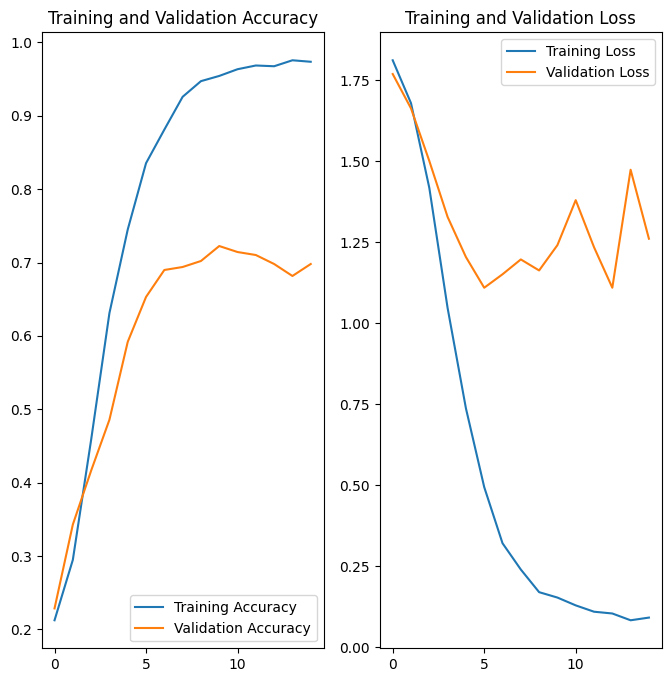

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
